### DATA VISUALIZATION

In [24]:
!pip install seaborn


In [1]:
#load python packages
import os
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.special import gamma
!pip install -U statsmodels # for cumulative distribution function
%matplotlib inline

Requirement already up-to-date: statsmodels in /Users/Jae/.pyenv/versions/3.7.3/lib/python3.7/site-packages (0.11.1)


### HISTOGRAM

In [2]:
url_histo = 'https://en.wikipedia.org/wiki/Histogram'


In [3]:
import webbrowser

# generate an URL

webbrowser.open(url_histo)

True

100 Data is randomly created for dataset1 and its min and max values are defined.

In [2]:
dataset1 = np.random.randn(100)
min_val1 = dataset1.min()
max_val1 = dataset1.max()
dataset1[:3]

array([ 0.38474806,  1.16841049, -0.80781939])

Plot un-normalized histogram of dataset1 using seaborn distplot.

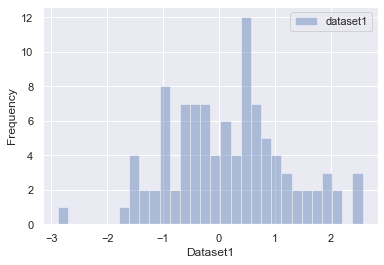

In [3]:
sns.set()
sns.distplot(dataset1, color='b', bins=30, norm_hist=False, kde=False, label='dataset1')
plt.xlabel('Dataset1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Plot normalized histogram of dataset1 using seaborn distplot.

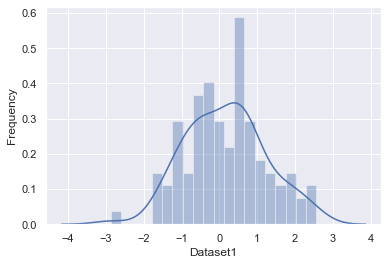

In [4]:
sns.set()
sns.distplot(dataset1, bins=20, color='b', norm_hist=True, kde=True)
plt.xlabel('Dataset1')
plt.ylabel('Frequency')
plt.show()

70 Data is randomly created for dataset2 and its min and max values are defined.

In [5]:
dataset2 = np.random.randn(70)
min_val2 = dataset2.min()
max_val2 = dataset2.max()

In [6]:
# To set the min and max for x-axis range
min_val = min(min_val1, min_val2)
max_val = max(max_val1, max_val2)

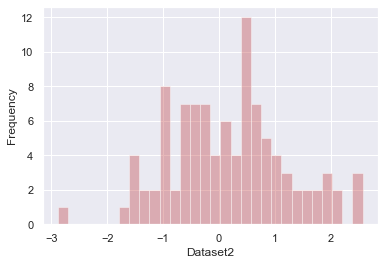

In [7]:
sns.set()
sns.distplot(dataset1, color='r', bins=30, norm_hist=False, kde=False)
plt.xlabel('Dataset2')
plt.ylabel('Frequency')
plt.show()

Compare two datasets in one figure

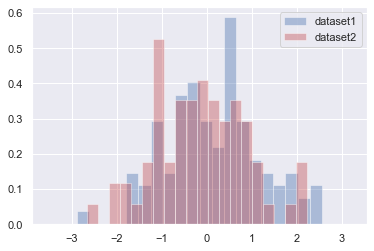

In [8]:
plt.xlim(min_val-1, max_val+1)
sns.set()
sns.distplot(dataset1, norm_hist=True, kde=False, color='b', bins=20, label='dataset1')
sns.distplot(dataset2, norm_hist=True, kde=False, color='r', bins=20, label='dataset2')
plt.legend()
plt.show()

In [9]:
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

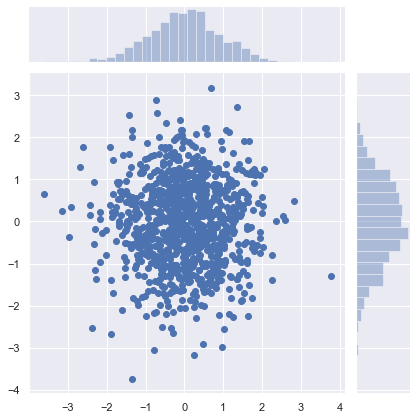

In [10]:
sns.jointplot(data1, data2)

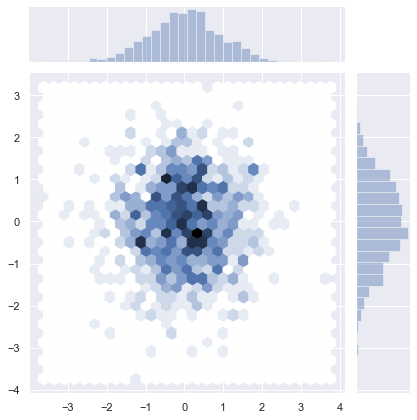

In [11]:
# The density shows thicker in the plot show below.
sns.jointplot(data1, data2, kind='hex')

### Bar Chart



In [12]:
cate1 = ['python', 'c++', 'java', 'Perl', 'Scala']
performance = [10,8,7,2,4]
variance = [2, 2, 3, 1, 2]

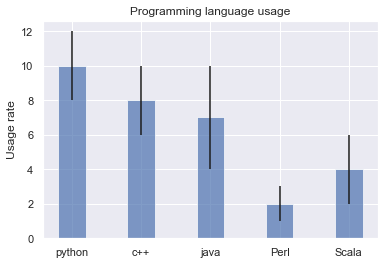

In [13]:
plt.bar(cate1, performance, width=0.4, align='center', alpha=0.7, yerr=variance)
plt.xticks(cate1)
plt.ylabel('Usage rate')
#plt.legend()
plt.title('Programming language usage')
plt.show()

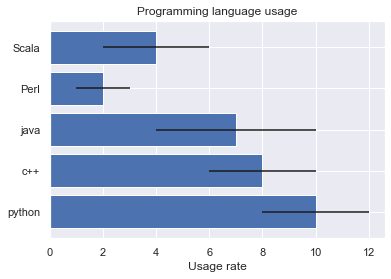

In [14]:
plt.barh(cate1, performance, xerr=variance)#, width=0.4)#, align='center', alpha=0.7)

plt.xlabel('Usage rate')
plt.title('Programming language usage')
plt.show()

### Kernel Density Estimation (kde)

In [15]:
dataset = np.random.randn(25)

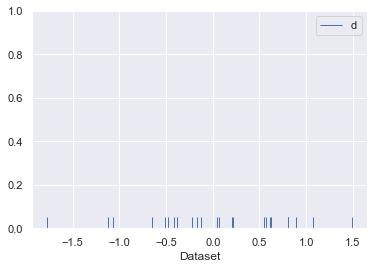

In [16]:
sns.rugplot(dataset)
plt.ylim(0, 1)
plt.xlabel('Dataset')
plt.legend('dataset')
plt.show()

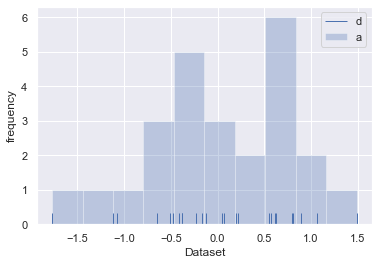

In [17]:
# alpha is for transparency
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)
plt.xlabel('Dataset')
plt.ylabel('frequency')
plt.legend('dataset')
plt.show()

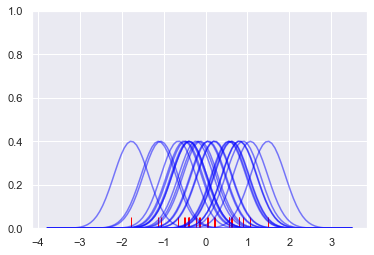

In [18]:
sns.rugplot(dataset, color='red')
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)
bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)) )**0.2
kernel_list = []

for data_point in dataset:
    # create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel*0.4
    plt.plot(x_axis, kernel, color='blue', alpha=0.5)

plt.ylim(0,1)
plt.show()

$h = (\frac{4\hat{\sigma}^{5}}{3n})^{0.2}$ 

where h is the bandwidth that minimizes the mean integrated squared error. 

In [19]:
# This url shows what the bandwidth for. 
url_kde = 'https://en.wikipedia.org/wiki/Kernel_density_estimation'
webbrowser.open(url_kde)

NameError: name 'webbrowser' is not defined

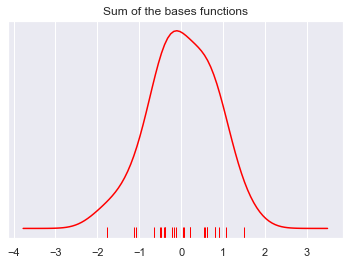

In [21]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color = 'red')
sns.rugplot(dataset, color='red')
plt.yticks([])
plt.title('Sum of the bases functions')
plt.show()

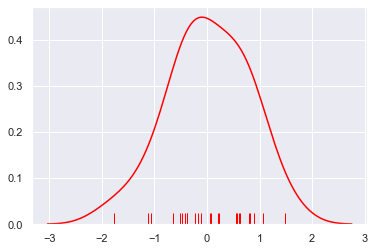

In [22]:
sns.kdeplot(dataset, color='red')
sns.rugplot(dataset, color='red')
plt.show()

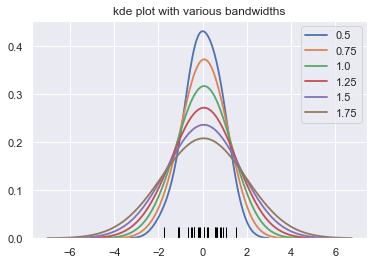

In [23]:
sns.rugplot(dataset, color = 'black')
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

plt.title('kde plot with various bandwidths')
plt.show()

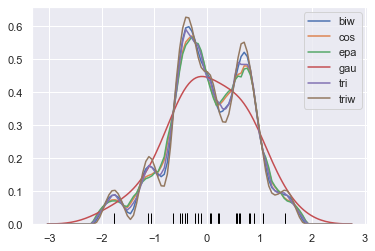

In [24]:
sns.rugplot(dataset, color = 'black')

kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for ker in kernel_options:
    sns.kdeplot(dataset, kernel=ker, label=ker, shade=False, vertical=False)
    
plt.show()

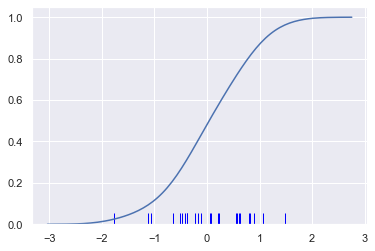

In [25]:
sns.kdeplot(dataset, cumulative=True)
sns.rugplot(dataset, color='blue')

/Users/Jae/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


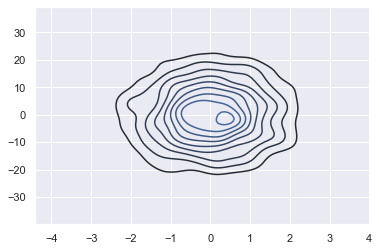

In [26]:
mean = [0,0]
cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

df = pd.DataFrame(dataset2, columns=['x', 'y'])
sns.kdeplot(df)
plt.show()

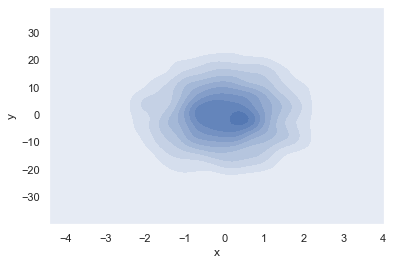

In [27]:
sns.kdeplot(df.x, df.y, shade=True)
plt.show()

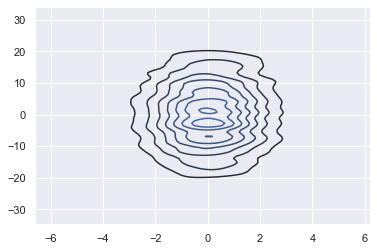

In [28]:
sns.kdeplot(df, bw=1)
plt.show()

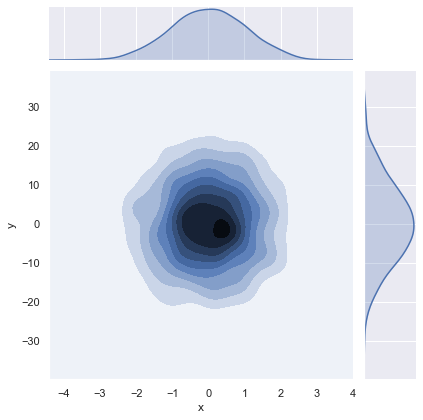

In [29]:
sns.jointplot('x','y', df, kind='kde')
plt.show()

Histogram and kde plot can be shown together in one figure by using seaborn distplot.

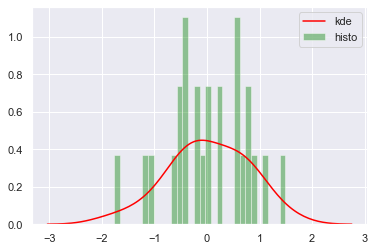

In [30]:
sns.distplot(dataset, bins=30, 
             hist_kws={'label':'histo', 'color':'green'},
             kde_kws={'label':'kde', 'color':'red'})
plt.show()

In [31]:
series1 = pd.Series(dataset, name='data')
series1.head(5)

0    0.549161
1   -0.409852
2   -0.647153
3    0.800897
4    0.896006
Name: data, dtype: float64

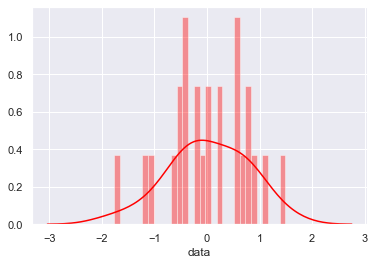

In [32]:
sns.distplot(series1, bins=30, color='red')

### BOX PLOT

In [33]:
box_data1=np.random.randn(100)
box_data2=np.random.randn(100)

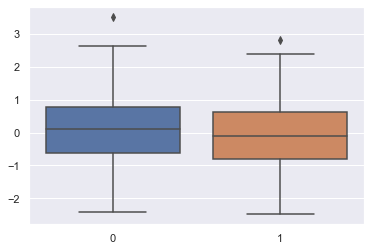

In [34]:
sns.boxplot(data=[box_data1, box_data2], orient='v')

Include outliers for both boxplot.

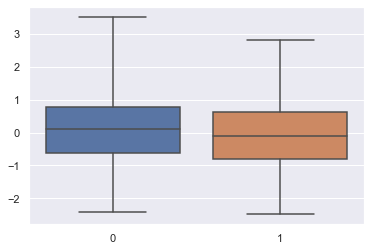

In [35]:
sns.boxplot(data=[box_data1, box_data2], whis=np.inf)

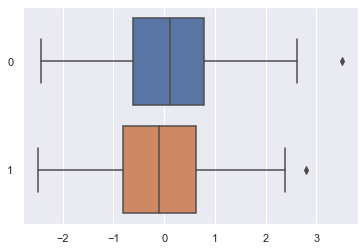

In [36]:
sns.boxplot(data=[box_data1, box_data2], orient='h')

stats.norm(loc=, scale=) is normal continuous random variable. where loc is mean and scale is standard deviation (a.k.a. Gaussian or bell curve). 

norm.pdf(x) $= f(x) = \frac{exp(-{x}^{2}/2)}{sqrt(2\pi)}$ 


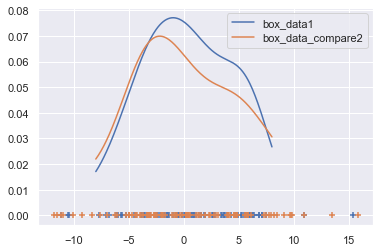

In [37]:
# Generate 100 samples of the random numbers where mean is 0 and std is 5.
box_data1=stats.norm(loc=0,scale=5).rvs(100)
density1 = stats.gaussian_kde(box_data1)
x=np.linspace(-8.0, 8.0, 200)
y=density1(x)

plt.plot(x, y)
plt.scatter(box_data1, np.zeros_like(box_data1), marker='+')
# Generate 100 samples in the same condition
# The trend will be the same, but generating the
# same samples are reproducible. 
box_data_compare2=stats.norm.rvs(loc=0,scale=5, size=100)
density2 = stats.gaussian_kde(box_data_compare2)
y2=density2(x)

plt.plot(x, y2)
plt.scatter(box_data_compare2, np.zeros_like(box_data_compare2), marker='+')

plt.legend(['box_data1','box_data_compare2'])
plt.show()

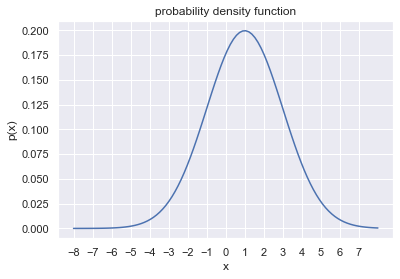

In [38]:
# mean (i.e. loc) = 1, scale (i.e. std) = 2.
rv = stats.norm(loc=1, scale=2)
x_vals = np.linspace(-8, 8, 100)
pdf=rv.pdf(x_vals)
plt.plot(x_vals, pdf)
plt.title('probability density function')
plt.xticks(np.arange(-8, 8, step=1))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

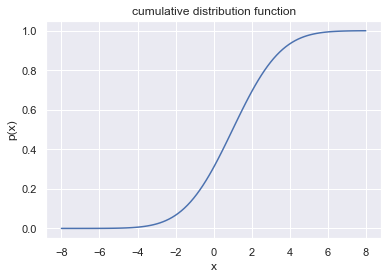

In [39]:
cdf = rv.cdf(x_vals)
plt.plot(x_vals, cdf)
plt.title('cumulative distribution function')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

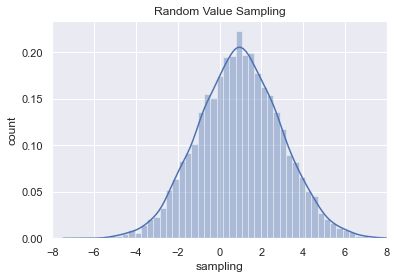

In [40]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title('Random Value Sampling')
plt.xlabel('sampling')
plt.ylabel('count')
plt.xlim(-8, 8)
plt.show()

stats.gamma(shape, loc=, scale=) is gamma continuous random variable. where shape is loc is mean and scale is standard deviation. 

gamma.pdf(x, shape, scale) $=f(x, shape, scale) = \frac{{x}^{shape-1}exp(-x/scale)}{{scale}^{shape} \Gamma (shape)}$ 


In [41]:
stats.gamma(5).rvs(1)

array([6.74290333])

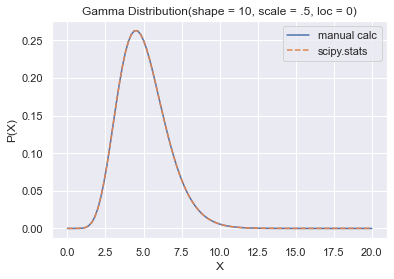

In [42]:
shape = 10
scale = .5
x = np.linspace(0, 20, 101)
y = x ** (shape - 1) * np.exp(-x / scale) / (scale ** shape * gamma(shape))
plt.plot(x, y)

loc = 0
y1 = stats.gamma(shape, loc=loc, scale=scale).pdf(x)
plt.plot(x, y1, '--')

plt.legend(['manual calc','scipy.stats'])
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, scale = .5, loc = 0)')
plt.show()

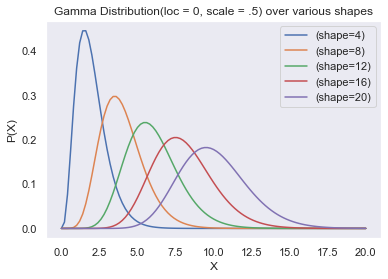

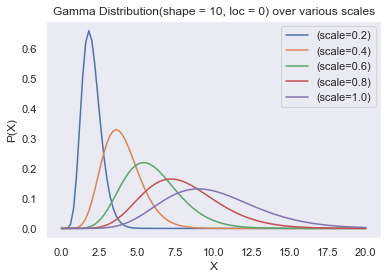

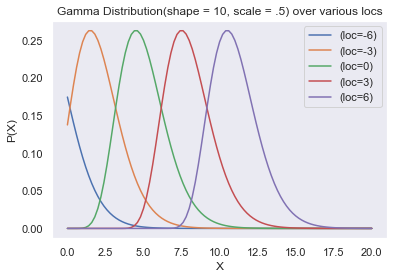

In [43]:

# As shape increases, gamma distribution gets wider.
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(loc = 0, scale = .5) over various shapes')
plt.grid()

for shape in np.arange(4, 24, 4):
    plt.plot(x, stats.gamma(shape, loc, scale).pdf(x), label='(shape=' + str(shape) + ')')
    
plt.legend()
plt.show()

# As scale increases, gamma distribution gets wider more extremely.
shape = 10

plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, loc = 0) over various scales')
plt.grid()

for scale in (np.arange(2, 12, 2) / 10):
    plt.plot(x, stats.gamma(shape, loc, scale).pdf(x), label='(scale=' + str(scale) + ')')
    
plt.legend()
plt.show()

# As loc increases, the position of gamma distribution shifts to right.
shape = 10
scale = .5

plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, scale = .5) over various locs')
plt.grid()

for loc in (np.arange(5) * 3 - 6):
    plt.plot(x, stats.gamma(shape, loc, scale).pdf(x), label='(loc=' + str(loc) + ')')
    
plt.legend()
plt.show()


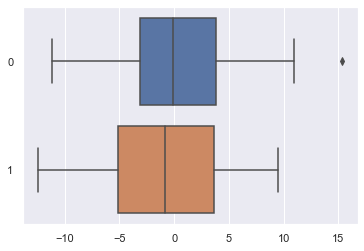

In [44]:
# Two gamma distribution concatenated together.
# one is positive gamma and the other is negative gamma.
box_data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                            -1*stats.gamma(5).rvs(50)])
sns.boxplot(data=[box_data1, box_data2], orient='h')
plt.show()

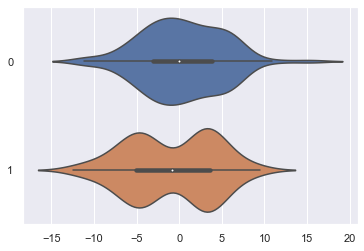

In [45]:
# violinplot shows the density (distribution of both the positive and
# negative gammas) while a boxplot does not show that.
sns.violinplot(data=[box_data1, box_data2], orient='h')
plt.show()

### VIOLIN PLOT

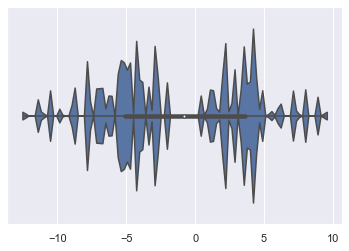

In [46]:
# Apply a small bandwidth for making sensitive
sns.violinplot(box_data2, bw=0.01)
plt.show()

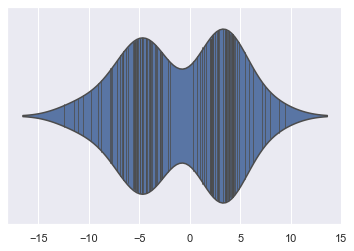

In [47]:
# Apply inner stick like a rugplot to violinplot.
sns.violinplot(box_data2, inner='stick')
plt.show()

### REGRESSION PLOT

In [66]:
# Get tips dataframe.
tips = sns.load_dataset('tips')

In [49]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


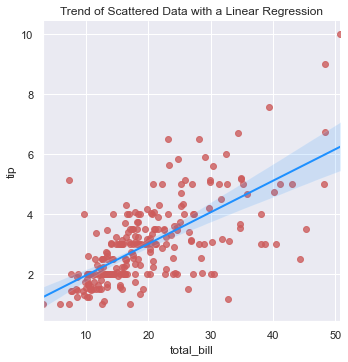

In [74]:
# regression plot.
sns.lmplot('total_bill', 'tip', tips, 
           scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':2,'color':'dodgerblue'})
plt.title('Trend of Scattered Data with a Linear Regression')
plt.show()

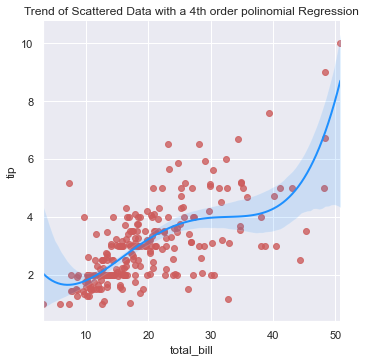

In [75]:
# regression plot with passing 4th order polynomial equation.
sns.lmplot('total_bill', 'tip', tips, order=4,
           scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':2,'color':'dodgerblue'})
plt.title('Trend of Scattered Data with a 4th order polinomial Regression')
plt.show()

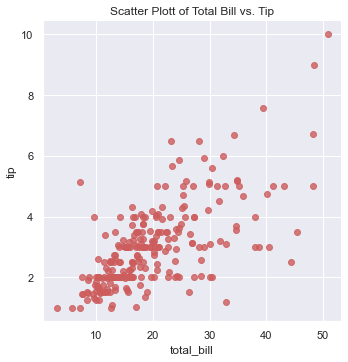

In [76]:
# scatter plot without regression line.
sns.lmplot('total_bill', 'tip', tips, fit_reg=False,
           scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':1,'color':'dodgerblue'})
plt.title('Scatter Plott of Total Bill vs. Tip')
plt.show()

In [77]:
# Add new column of tip percentage ('tip_pect') to the dataframe tips.
tips['tip_pect']=(tips['tip']/tips['total_bill'])*100


In [78]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734


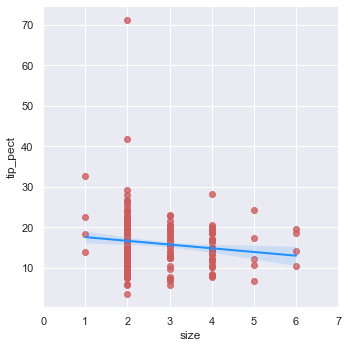

In [79]:
sns.lmplot(data=tips, x='size', y='tip_pect',
          scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':2,'color':'dodgerblue'})
plt.xlim(0,7)
plt.show()

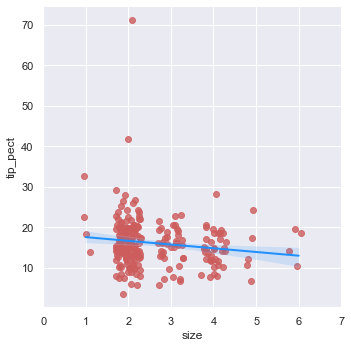

In [80]:
# Make x-axis ('size') distribution wider using x_jitter.
sns.lmplot(data=tips, x='size', y='tip_pect', x_jitter=0.3,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':2,'color':'dodgerblue'})
plt.xlim(0,7)
plt.show()

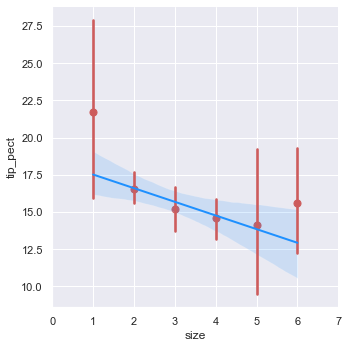

In [81]:
# Simplify the tendency using x_estimator be mean. 
sns.lmplot(data=tips, x='size', y='tip_pect', x_estimator=np.mean,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':2,'color':'dodgerblue'})
plt.xlim(0,7)
plt.show()

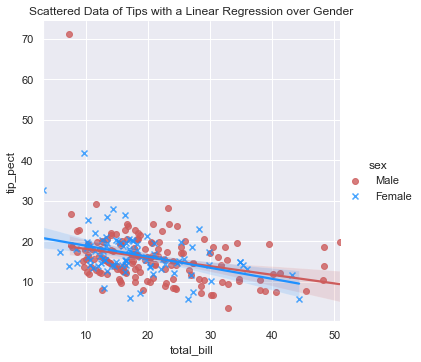

In [82]:
sns.lmplot(data=tips, x='total_bill', y='tip_pect',hue='sex',
           markers=['o', 'x'], palette=['indianred','dodgerblue'])
plt.title('Scattered Data of Tips with a Linear Regression over Gender')
plt.show()

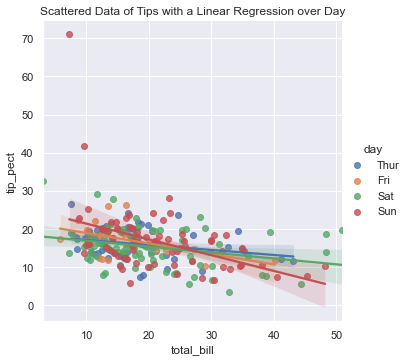

In [83]:
sns.lmplot(data=tips, x='total_bill', y='tip_pect',hue='day')
plt.title('Scattered Data of Tips with a Linear Regression over Day')
plt.show()

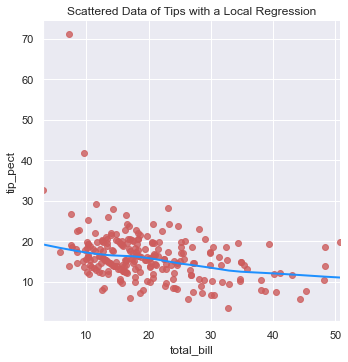

In [85]:
# apply local regression.
sns.lmplot(data=tips, x='total_bill', y='tip_pect',lowess=True, 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':2,'color':'dodgerblue'})
plt.title('Scattered Data of Tips with a Local Regression')
plt.show()

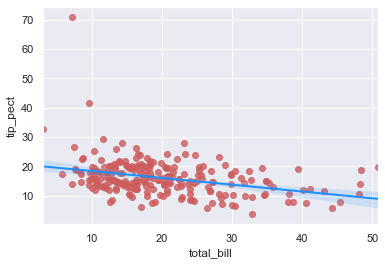

In [86]:
# apply regression.
sns.regplot(data=tips, x='total_bill', y='tip_pect', 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':2,'color':'dodgerblue'})

plt.show()

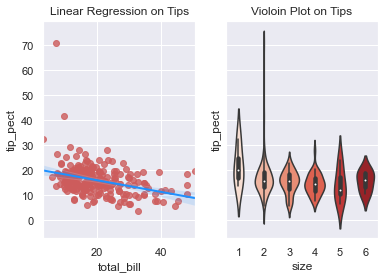

In [121]:
fig, (axis1, axis2)=plt.subplots(1,2,sharey=True)
sns.regplot(data=tips, x='total_bill', y='tip_pect', 
            scatter_kws={'marker':'o','color':'indianred'},
            line_kws={'linewidth':2,'color':'dodgerblue'},
            ax=axis1)
axis1.set_title('Linear Regression on Tips')
sns.violinplot(x=tips['size'], y=tips['tip_pect'], palette='Reds',ax=axis2)
axis2.set_title('Violoin Plot on Tips')
plt.show()

### HEAT MAP

In [89]:
# Load flights dataframe.
flight_df=sns.load_dataset('flights')
flight_df.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [90]:
# Reshape it as index='month', columns='year', values='passengers'
flight_df=flight_df.pivot(index='month', columns='year', values='passengers')
flight_df.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419


In [92]:
# Check if there is a null in the data.
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 12 entries, January to December
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1949    12 non-null     int64
 1   1950    12 non-null     int64
 2   1951    12 non-null     int64
 3   1952    12 non-null     int64
 4   1953    12 non-null     int64
 5   1954    12 non-null     int64
 6   1955    12 non-null     int64
 7   1956    12 non-null     int64
 8   1957    12 non-null     int64
 9   1958    12 non-null     int64
 10  1959    12 non-null     int64
 11  1960    12 non-null     int64
dtypes: int64(12)
memory usage: 1.5 KB


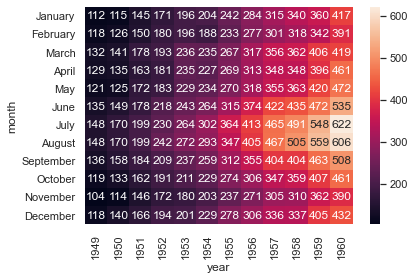

In [122]:
# apply annotation (annot) for each cell indicates number of passengers
sns.heatmap(data=flight_df, annot=True, fmt='d')
plt.show()

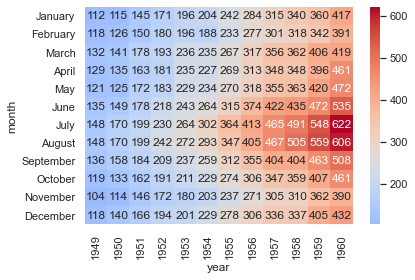

In [147]:
# apply color scheme centered at Jan. 1955 of the data.
midpoint = (flight_df.values.max() - flight_df.values.min()) / 2
sns.heatmap(data=flight_df, center=midpoint, # or center=flight_df.loc['January',1955], 
            annot=True, fmt='d', cmap='coolwarm')
plt.show()

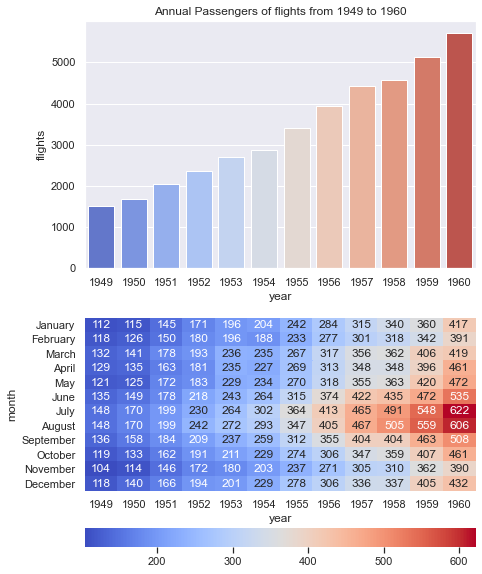

In [162]:
# subplots 2 rows and 1 column.
fig, (axis1, axis2) = plt.subplots(2,1, figsize=(7, 10))
sns.set()
# since the columns are years, each column sums all the values under each column.
yearly_flights=pd.DataFrame(flight_df.sum(), columns=['flights'])
yearly_flights_reindexed=yearly_flights.reset_index()

sns.barplot(data=yearly_flights_reindexed, x='year', y='flights', 
            ax=axis1, palette='coolwarm')
#axis1.set_title('barplot')

sns.heatmap(flight_df, ax=axis2,annot=True,fmt='d',cmap='coolwarm',
           cbar_kws={'orientation':'horizontal'})

axis1.set_title('Annual Passengers of flights from 1949 to 1960')
plt.show()


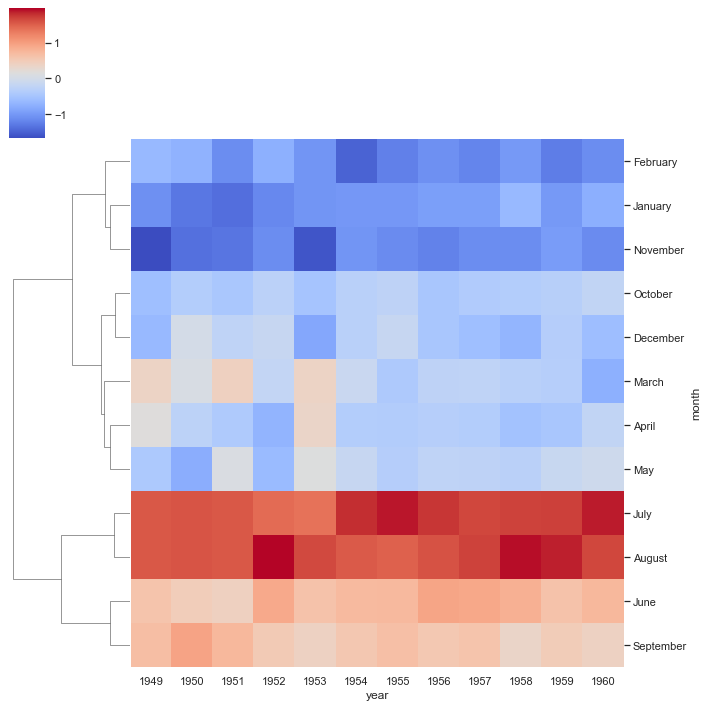

In [166]:
# To find the most relevant months (index) in terms
# of number of passengers, turn column cluster off and
# Applying z-score=1 means z=(x-mean)/std for each column
# which helps how far a data point from the mean.

sns.clustermap(data=flight_df, col_cluster=False, 
              z_score=1, cmap='coolwarm')

### Practice for Data Visualization

DATASET: https://drive.google.com/file/d/1NTI8YU97JK81XqwwMn2EDJaEpIsJiyp8/view?usp=sharing

In [167]:
path = '/Users/Jae/Google_Drive_jae0325/DATA_SCIENCE/Medium_examples/StudentsPerformance.csv'
students=pd.read_csv(path)
students.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [168]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [169]:
students['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

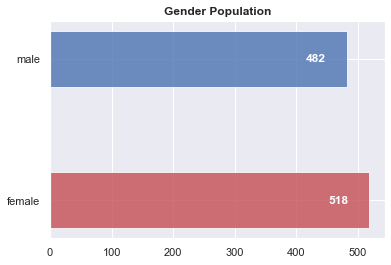

In [170]:
#sns.barplot(x=data['gender'].value_counts().index, y=data['gender'].value_counts().values)
gender_x=students['gender'].value_counts().index 
gender_y=students['gender'].value_counts().values
width = 0.4
plt.barh(gender_x, gender_y, width, color=['r', 'b'], alpha=0.8)
plt.title('Gender Population', fontweight="bold")
#plt.ylabel('Population')
for y_loc, x_loc in enumerate(gender_y):
    plt.text(x_loc-50, y_loc, str(x_loc), color='white', fontweight='bold', ha='center', va='center')
plt.show()

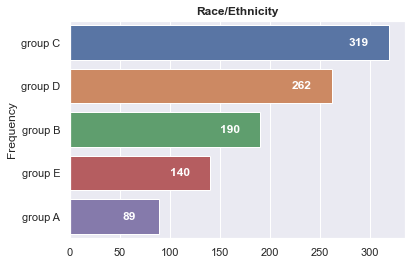

In [171]:
#plt.figure(figsize=(7,7))
race_x=students['race/ethnicity'].value_counts().index
race_y=students['race/ethnicity'].value_counts().values
for y_loc, x_loc in enumerate(race_y):
    plt.text(x_loc-30, y_loc, str(x_loc), color='white', fontweight='bold', ha='center', va='center')
sns.barplot(race_y, race_x)
#plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity', fontweight="bold")
plt.show()

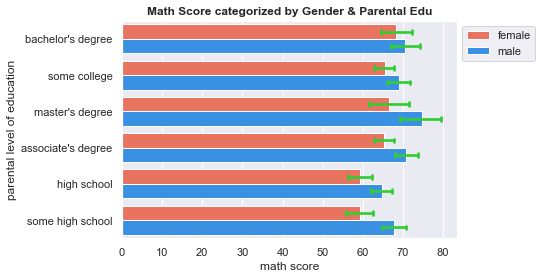

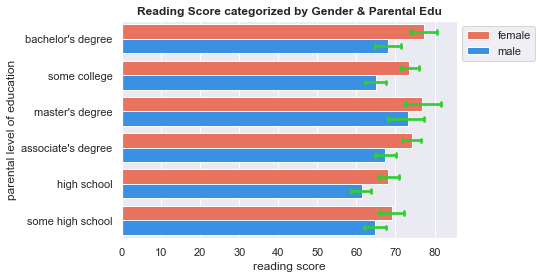

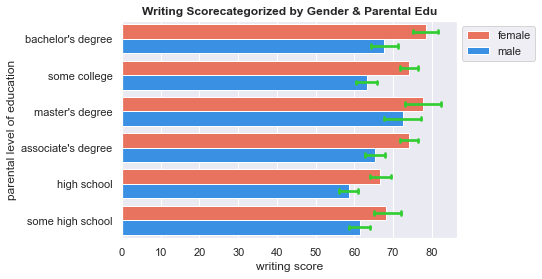

In [178]:
plt.subplot()

#sns.set(color_codes=True)

ms_bar = sns.barplot(data=students, errcolor='limegreen',
                     y="parental level of education", x="math score", 
                     hue="gender", palette=['tomato', 'dodgerblue'], capsize=.1)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.title("Math Score categorized by Gender & Parental Edu", fontweight="bold")
plt.show()

rs_bar = sns.barplot(data=students, errcolor='limegreen',
                    y="parental level of education", x="reading score",
                    hue = "gender", palette=['tomato', 'dodgerblue'], capsize=.1)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.title("Reading Score categorized by Gender & Parental Edu", fontweight="bold")
plt.show()

ws_bar = sns.barplot(data=students, errcolor='limegreen',
                     y="parental level of education", x="writing score", 
                     hue="gender", palette=['tomato', 'dodgerblue'], capsize=.1)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.title("Writing Scorecategorized by Gender & Parental Edu", fontweight="bold")
plt.show()

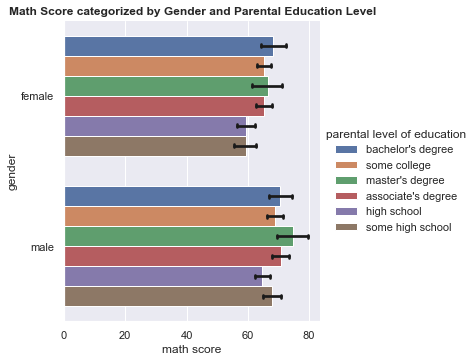

In [179]:
sns.catplot(data=students, y="gender", x="math score", 
                 hue="parental level of education",
                 kind="bar", errcolor='k', capsize=.02)
plt.xticks(rotation=0)
#plt.legend(bbox_to_anchor=(1,1), loc='best')
plt.title('Math Score categorized by Gender and Parental Education Level', fontweight="bold")
plt.show()

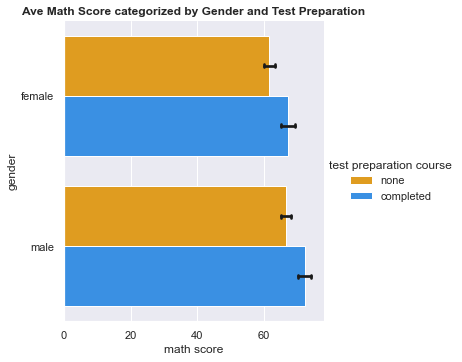

In [180]:
sns.catplot(data=students, y="gender", x="math score", palette=['orange', 'dodgerblue'],
            kind="bar", hue="test preparation course",
            errcolor='k', capsize=.02)
plt.title('Ave Math Score categorized by Gender and Test Preparation', fontweight="bold")
plt.show()

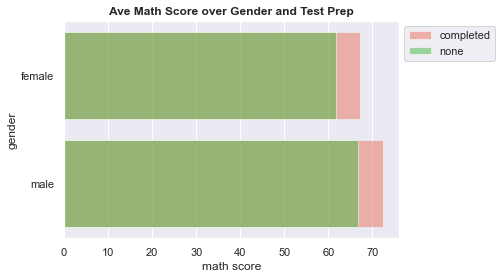

In [181]:
# Condition of students who completed test prep course.
cond_yes_test = students['test preparation course']=='completed'
# ci=None for error bar off.
sns.barplot(data=students[cond_yes_test], 
            x="math score", y="gender", ci=None,
            alpha=0.5,color='tomato',label='completed')

cond_no_test = students['test preparation course']=='none'
sns.barplot(data=students[cond_no_test],
            x="math score", y="gender", ci=None,
            alpha=0.5,color='limegreen',label='none')

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)
plt.xlabel('math score')
plt.ylabel('gender')
plt.title("Ave Math Score over Gender and Test Prep", fontweight="bold")
plt.show()

/Users/Jae/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  del sys.path[0]


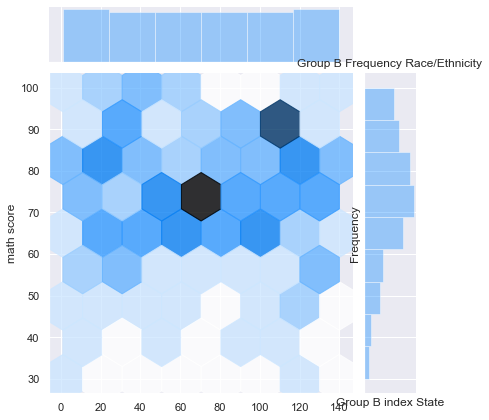

In [183]:
# kind='hex' shows the density clear in the group E students' math score. 
# x-axis indicates each individual student and y-axis indicates math score.
# the side bar of the histogram follows a normal distribution.
groupE=students['race/ethnicity']=='group E'
groupE_length=students[groupE]['math score'].count()
sns.jointplot(x=np.arange(1,groupE_length+1),
              y=students[groupE]['math score'],
              color='dodgerblue',alpha=0.8, kind='hex')
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

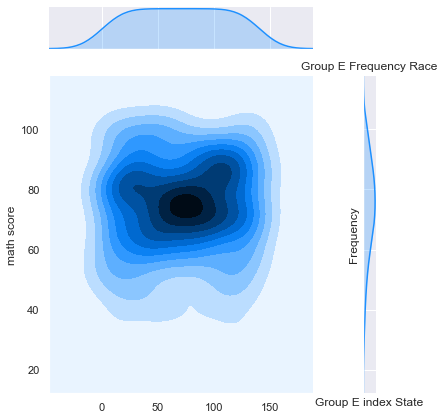

In [184]:
sns.jointplot(x=np.arange(1,groupE_length+1),
              y=students[groupE]['math score'],
              color='dodgerblue',space=0,kind='kde')
plt.xlabel('Group E index State')
plt.ylabel('Frequency')
plt.title('Group E Frequency Race')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

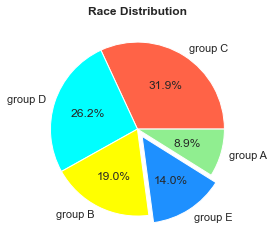

In [188]:
# Race Distribution.
labels=students['race/ethnicity'].value_counts().index
colors=['tomato','cyan','yellow','dodgerblue','lightgreen']
explode=[0,0,0,0.1,0]
values=students['race/ethnicity'].value_counts().values

plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race Distribution',fontweight="bold")
plt.show()



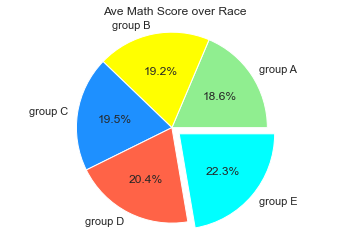

[['group A' 'group B' 'group C' 'group D' 'group E']
 ['61.62921348314607' '63.45263157894737' '64.46394984326018'
  '67.36259541984732' '73.82142857142857']]


In [196]:
# Ave Math Score over Race.
races = ['group A', 'group B', 'group C', 'group D','group E']
mean_math = students.groupby('race/ethnicity')['math score'].mean().values
colors_math = ['lightgreen', 'yellow', 'dodgerblue', 'tomato', 'cyan']
explodes_math = [0,0,0,0,0.1]

plt.pie(mean_math,labels=races,colors=colors_math,explode=explodes_math,
        autopct='%1.1f%%', shadow=False)
plt.title('Ave Math Score over Race')
plt.axis('equal')
plt.show()
print(np.vstack((races,mean_math)))

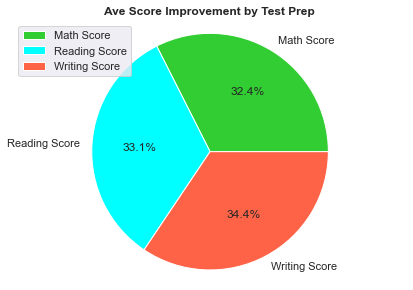

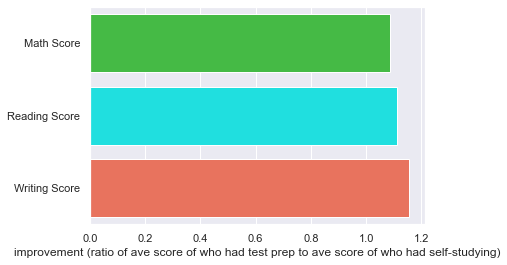

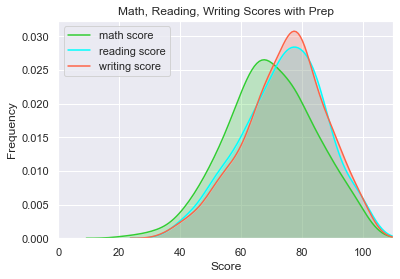

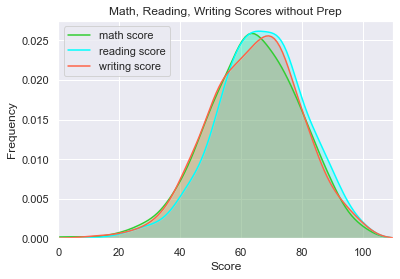

In [197]:
# Show how test prep increased the students' performances over all subjects
subjects=['Math Score', 'Reading Score', 'Writing Score']
colors_sub=['limegreen', 'cyan', 'tomato']
explodes_sub=[0,0,0]
math_improv = students[cond_yes_test]['math score'].mean()/students[cond_no_test]['math score'].mean()
reading_improv = students[cond_yes_test]['reading score'].mean()/students[cond_no_test]['reading score'].mean()
writing_improv = students[cond_yes_test]['writing score'].mean()/students[cond_no_test]['writing score'].mean()
mean_sub=[math_improv, 
        reading_improv, 
        writing_improv]

plt.pie(mean_sub,labels=subjects,colors=colors_sub,explode=explodes_sub,
        autopct='%1.1f%%',shadow=False)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'] , loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.title("Ave Score Improvement by Test Prep", fontweight="bold")
plt.show()

sns.barplot(x=[math_improv, reading_improv, writing_improv], y=subjects, palette=colors_sub)
plt.xlabel('improvement (ratio of ave score of who had test prep to ave score of who had self-studying)')
#plt.ylabel('')
#plt.title("Ave Score Improvement by Test Prep", fontweight="bold")
plt.show()

plt.xlim(0,110)
sns.kdeplot(students[cond_yes_test]['math score'],shade=True,color=colors_sub[0], legend='math with prep')
sns.kdeplot(students[cond_yes_test]['reading score'],shade=True,color=colors_sub[1], legend='reading with prep')
sns.kdeplot(students[cond_yes_test]['writing score'],shade=True,color=colors_sub[2], legend='writing with prep')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Math, Reading, Writing Scores with Prep')
plt.show()

plt.xlim(0,110)
sns.kdeplot(students[cond_no_test]['math score'],shade=True,color=colors_sub[0])
sns.kdeplot(students[cond_no_test]['reading score'],shade=True,color=colors_sub[1])
sns.kdeplot(students[cond_no_test]['writing score'],shade=True,color=colors_sub[2])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Math, Reading, Writing Scores without Prep')
plt.show()

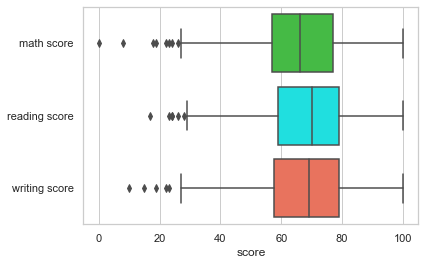

In [219]:
# Students' score over subjects.
sns.set(style='whitegrid')
sns.boxplot(x = [students['math score'], students['reading score'], students['writing score']],
            y = list(students.columns[-3:]),
            palette=colors_sub)
plt.xlabel('score')
plt.show()

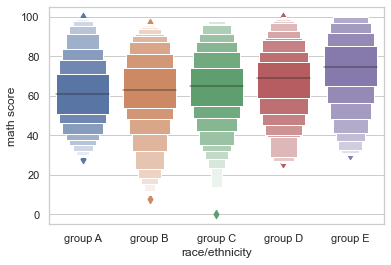

In [248]:
races_lst=sorted(list(students['race/ethnicity'].unique()))

sns.boxenplot(data=students,
              x='race/ethnicity', y='math score',
              scale='linear', order=races_lst)
plt.show()

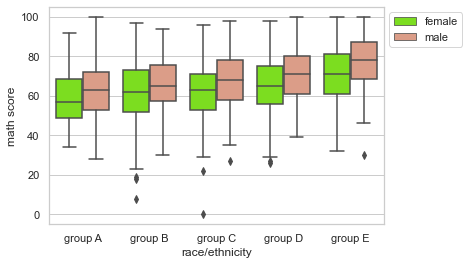

In [250]:
sns.boxplot(x=students['race/ethnicity'],
            y=students['math score'],
            hue=students['gender'],
            palette=['lawngreen','darksalmon'],
            order=races_lst, dodge=True)
plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)
plt.show()

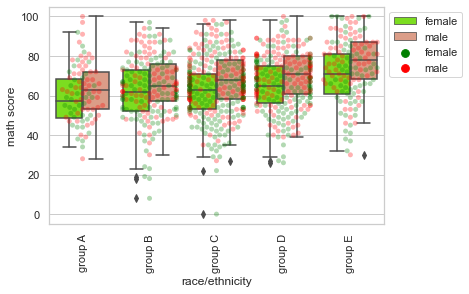

In [261]:
# Showing boxplot and swamplot offsets the cons of
# its simplicity for distribution. 
sns.boxplot(x=students['race/ethnicity'],
            y=students['math score'],
            hue=students['gender'],
            palette=['lawngreen','darksalmon'],
            order=races_lst, dodge=True)
plt.xticks(rotation=90)

sns.swarmplot(x=students['race/ethnicity'],
              y=students['math score'],
              hue=students['gender'], alpha=0.3,
              palette=['green','red'],
              order=races_lst
              )
plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)
plt.show()

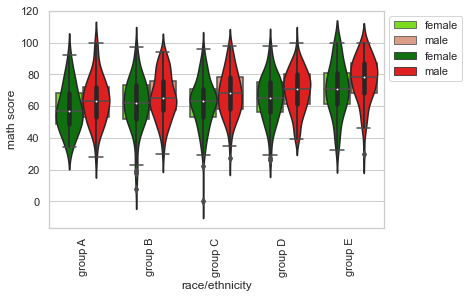

In [280]:
# Showing boxplot and violinplot.
sns.boxplot(x=students['race/ethnicity'],
            y=students['math score'],
            hue=students['gender'],
            palette=['lawngreen','darksalmon'],
            order=races_lst, dodge=True)
plt.xticks(rotation=90)

sns.violinplot(x=students['race/ethnicity'],
              y=students['math score'],
              hue=students['gender'], alpha=0.3,
              palette=['green','red'],
              order=races_lst
              )
plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)
plt.show()

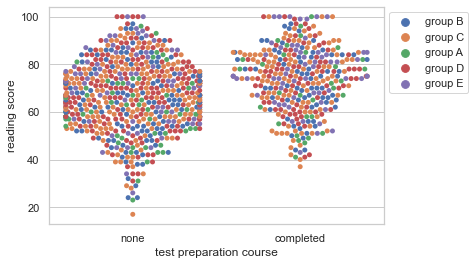

In [281]:
# Swarm plots accurately shows test prep helps 
# students' performance on reading.
sns.swarmplot(x=students['test preparation course'],
              y=students['reading score'],
              hue=students['race/ethnicity'])

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)

plt.show()

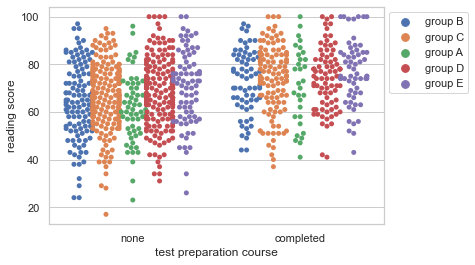

In [282]:
# It can be shown by grouping them. 
sns.swarmplot(x=students['test preparation course'],
              y=students['reading score'],
              hue=students['race/ethnicity'],
              dodge=True)

plt.legend(bbox_to_anchor=(1,1), loc='best', frameon=True)

plt.show()

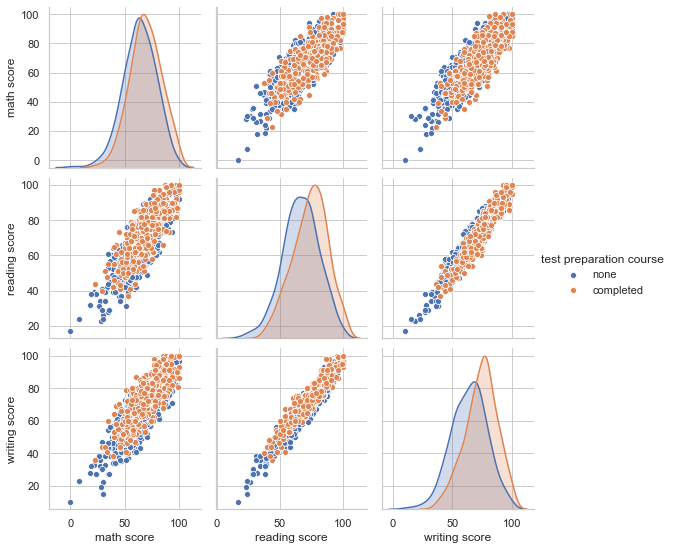

In [290]:
# pair plot for how test prep affected the scores.
sns.pairplot(data=students,diag_kind='kde',
            hue='test preparation course')
plt.show()

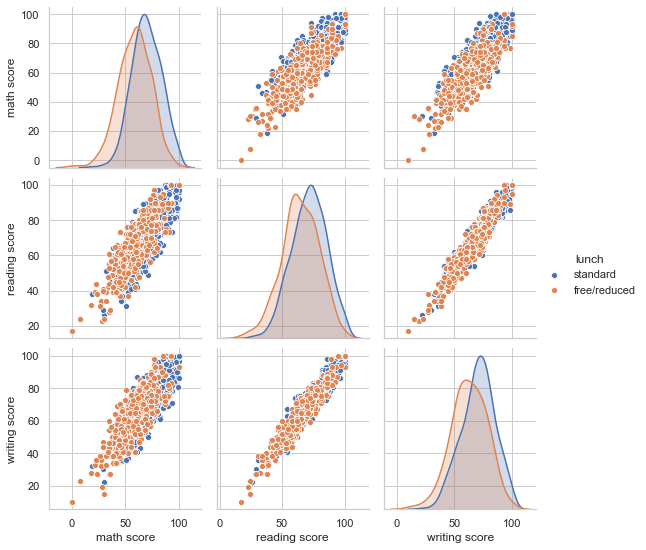

In [289]:
# Pairplot for how luch affected the scores. 
sns.pairplot(data=students,diag_kind='kde',
            hue='lunch')
plt.show()